In [12]:
import torch
import matplotlib.pyplot as plt

# Function to visualize the input and output
def visualize_prediction(model, data_loader, device, max_images=10):
    model.eval()  # Set model to evaluation mode
    
    # Get a batch of images
    images = next(iter(data_loader))
    images = images.to(device)
    
    # Limit the number of images displayed
    if len(images) > max_images:
        images = images[:max_images]

    # Perform inference (forward pass)
    with torch.no_grad():
        _, reconstructed = model(images)

    # Move data back to CPU for visualization
    images = images.cpu()
    reconstructed = reconstructed.cpu()

    # Display the original and reconstructed images
    fig, axes = plt.subplots(2, len(images), figsize=(15, 5))

    for i in range(len(images)):
        # Original image
        axes[0, i].imshow(images[i].squeeze(), cmap='gray')
        axes[0, i].set_title("Original", fontsize=10)
        axes[0, i].axis('off')

        # Reconstructed image
        axes[1, i].imshow(reconstructed[i].squeeze(), cmap='gray')
        axes[1, i].set_title("Reconstructed", fontsize=10)
        axes[1, i].axis('off')

    # plt.tight_layout()  # Avoid overlapping of titles and images
    # Adjust subplot spacing to prevent overlap
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.show()


In [13]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

# Custom dataset class
class CustomGrayscaleDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.image_files = os.listdir(root_dir)  # List of all image file names
        self.transform = transform  # Apply transformations if provided

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load the image at index `idx`
        img_path = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_path).convert('L')  # Convert to grayscale ('L' mode)

        # Apply any transformations
        if self.transform:
            image = self.transform(image)

        return image


In [14]:
from torch.utils.data import DataLoader
from torchvision import transforms

# Define transformations: Resize images to 200x200 and convert to tensor
test_transform = transforms.Compose([
    transforms.Resize((200, 200)),  # Resize images to 200x200
    transforms.ToTensor(),  # Convert images to tensor (values between 0 and 1)
])

# Create the test dataset object (using the custom dataset class)
test_dataset = CustomGrayscaleDataset(root_dir='./data/test_data/1/labels', transform=test_transform)

# Create the test DataLoader to load images in batches of 32
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


cuda


/tmp/ipykernel_114664/2650042737.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load('saved/models/model_20240920_121522_50.pt'))


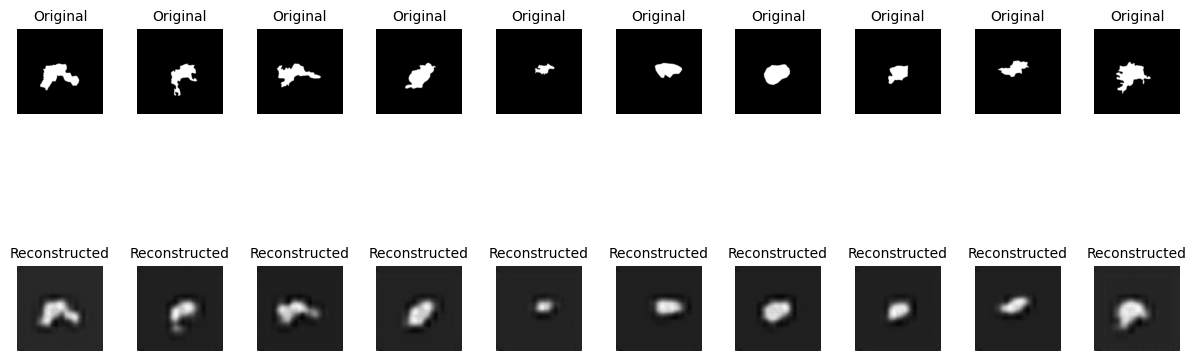

In [15]:
from model import build_AE
from utils.loader import KFoldDataset
from torchvision import transforms

# Assume you have your model and DataLoader ready
# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
# Load the trained model (if already saved)
autoencoder = build_AE()  # Make sure this matches the original model architecture
autoencoder.load_state_dict(torch.load('saved/models/model_20240920_121522_50.pt'))
autoencoder.to(device)

# Visualize predictions (using the data loader defined earlier)
visualize_prediction(autoencoder, test_loader, device)


/tmp/ipykernel_114664/978449100.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load('saved/models/model_20240920_121522_97.pt'))


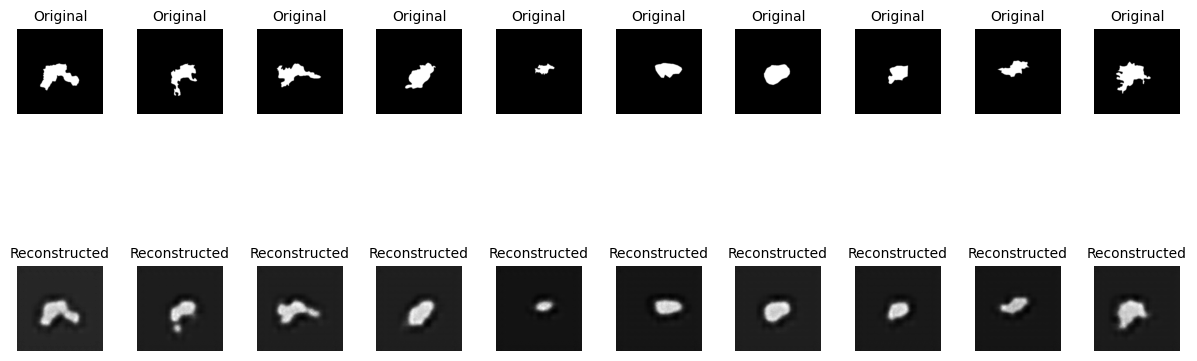

In [16]:
from model import build_AE
from utils.loader import KFoldDataset
from torchvision import transforms

# Assume you have your model and DataLoader ready
# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the trained model (if already saved)
autoencoder = build_AE()  # Make sure this matches the original model architecture
autoencoder.load_state_dict(torch.load('saved/models/model_20240920_121522_97.pt'))
autoencoder.to(device)

# Visualize predictions (using the data loader defined earlier)
visualize_prediction(autoencoder, test_loader, device)


/tmp/ipykernel_9958/4132821165.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load('/home/samel/workplace/ae-zero-shot/model_20240917

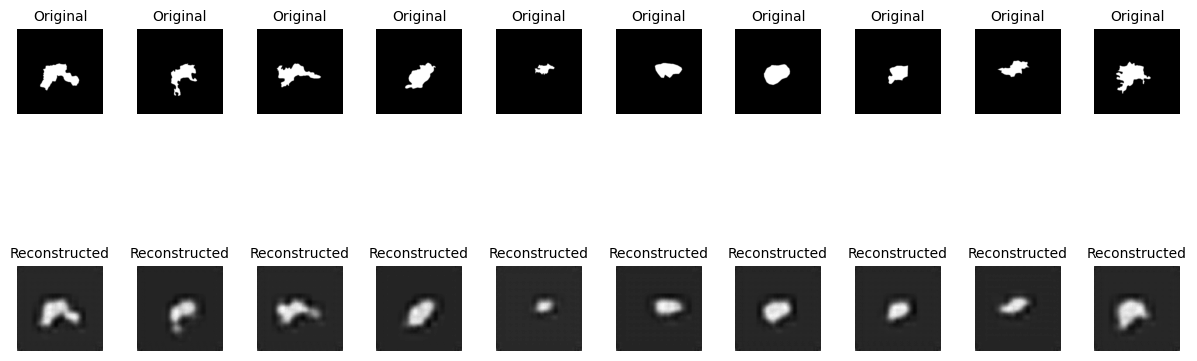

In [5]:
from model import build_AE
from utils.loader import KFoldDataset
from torchvision import transforms

# Assume you have your model and DataLoader ready
# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the trained model (if already saved)
autoencoder = build_AE()  # Make sure this matches the original model architecture
autoencoder.load_state_dict(torch.load('/home/samel/workplace/ae-zero-shot/model_20240917_163744_49.pt'))
autoencoder.to(device)

# Visualize predictions (using the data loader defined earlier)
visualize_prediction(autoencoder, test_loader, device)

/tmp/ipykernel_9410/3966270817.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load('/home/samel/workplace/ae-zero-shot/model_20240917

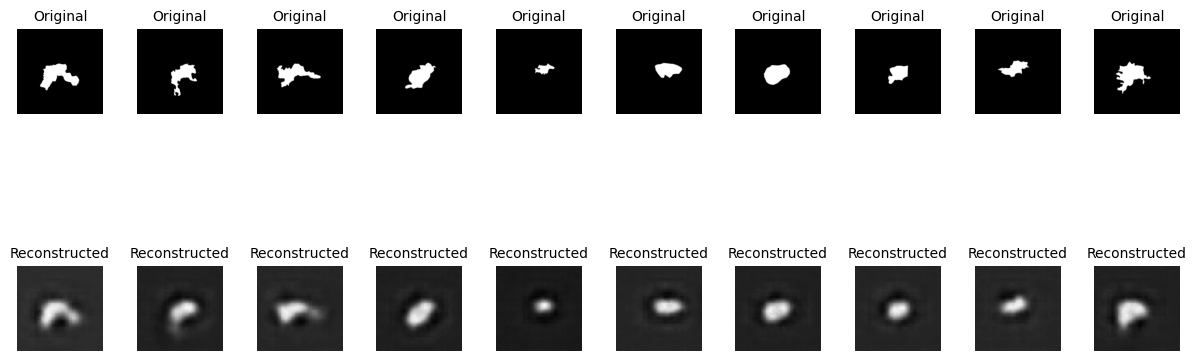

In [4]:
from model import build_AE
from utils.loader import KFoldDataset
from torchvision import transforms

# Assume you have your model and DataLoader ready
# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the trained model (if already saved)
autoencoder = build_AE()  # Make sure this matches the original model architecture
autoencoder.load_state_dict(torch.load('/home/samel/workplace/ae-zero-shot/model_20240917_162833_47.pt'))
autoencoder.to(device)

# Visualize predictions (using the data loader defined earlier)
visualize_prediction(autoencoder, test_loader, device)

/tmp/ipykernel_8515/2972368457.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  autoencoder.load_state_dict(torch.load('/home/samel/workplace/ae-zero-shot/model_20240917

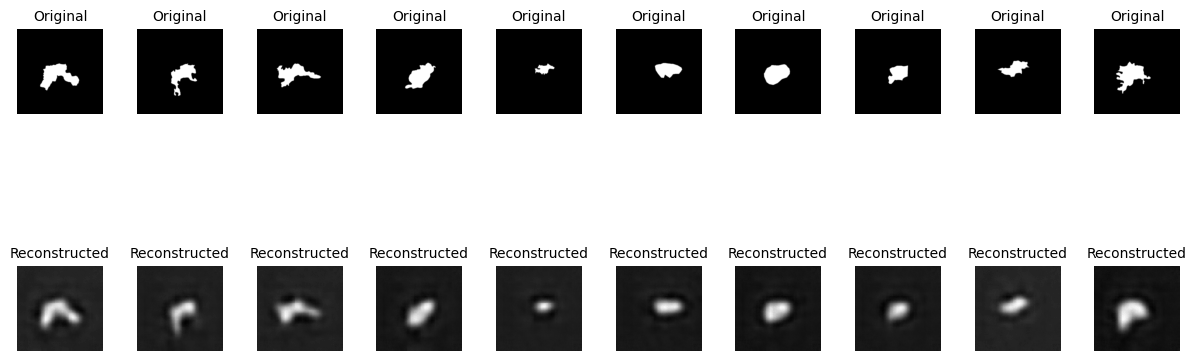

In [6]:
from model import build_AE
from utils.loader import KFoldDataset
from torchvision import transforms

# Assume you have your model and DataLoader ready
# Move the model to the appropriate device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Load the trained model (if already saved)
autoencoder = build_AE()  # Make sure this matches the original model architecture
autoencoder.load_state_dict(torch.load('/home/samel/workplace/ae-zero-shot/model_20240917_161740_47.pt'))
autoencoder.to(device)

# Visualize predictions (using the data loader defined earlier)
visualize_prediction(autoencoder, test_loader, device)